<AxesSubplot:>

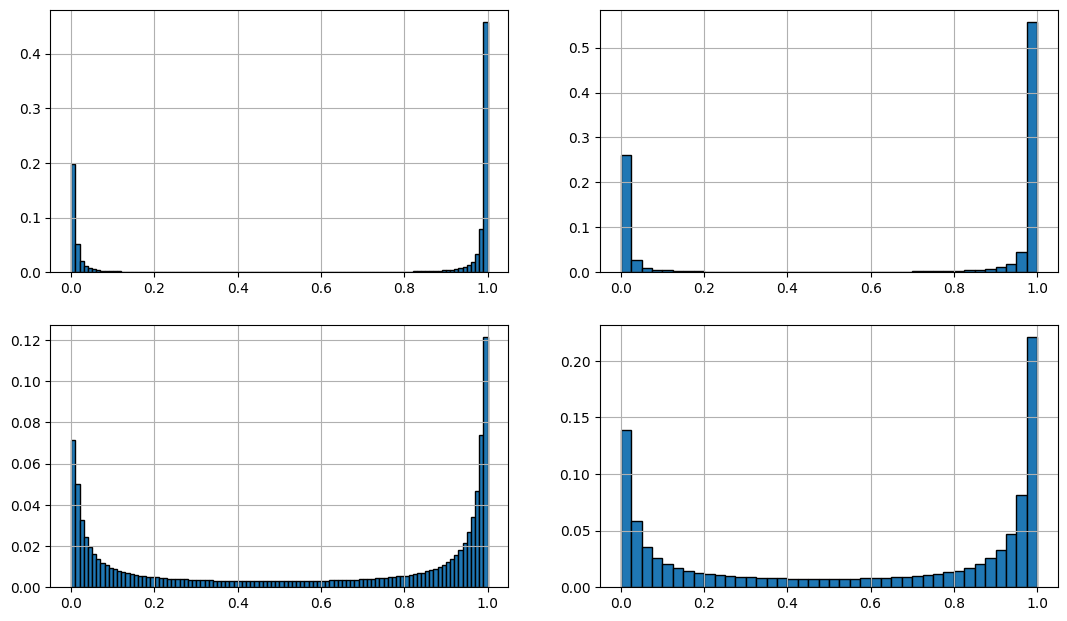

In [15]:
# Ross 70 reti - pol and undecidable

import pandas as pd
import numpy as np
pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_undecidable_shift+1_more1_to_more10/File_buono.csv"
pat_pol = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_polarity_shift+1_more1_to_more10/File_buono.csv"
datapd_pol = pd.read_csv(pat_pol)
datapd_und = pd.read_csv(pat_und)
mean_pol = datapd_pol.loc[:,list(datapd_pol.columns)[2:]].mean(axis=1)  # elimino col traccia e y_mano!
mean_und = datapd_und.mean(axis=1)

lis = []
for i, col in enumerate(datapd_pol.columns):
    if i > 1:
        lis.append(col)

df_bool_pol = (datapd_pol.loc[:,lis] >=0.5)
votation_pol = df_bool_pol.sum(axis=1)

lis = []
for i, col in enumerate(datapd_und.columns):
    if i > 1:
        lis.append(col)

df_bool_und = (datapd_und.loc[:,lis] >=0.5)
votation_und = df_bool_und.sum(axis=1)

binnaggio = 100
import matplotlib.pyplot as plt
fig, axi = plt.subplots(2,2, figsize=(13,7.5))
mean_pol.hist(bins=binnaggio, edgecolor="black", ax=axi[0][0], weights=np.ones(len(mean_pol)) / len(mean_pol))
mean_pol.hist(bins=40, edgecolor="black", ax=axi[0][1], weights=np.ones(len(mean_pol)) / len(mean_pol))
mean_und.hist(bins=binnaggio, edgecolor="black",   ax=axi[1][0],weights=np.ones(len(mean_und)) / len(mean_und))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[1][1],weights=np.ones(len(mean_und)) / len(mean_und))

In [14]:
# Ross plot undecidable SORT
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd
pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_undecidable_shift+1_more1_to_more10/File_buono.csv"
hdf5in = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_data.hdf5"
csv5in = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_metadata.csv"

# hdf5in = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_data_tot_no0.hdf5"
# csv5in = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_metadata_tot_no0.csv"
# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"

Data = ClasseDataset()
Data.leggi_custom_dataset(hdf5in, csv5in)
pred = pd.read_csv(pat_und)
mean_und = pred.mean(axis=1)
print(mean_und)

mean_und = mean_und.sort_values()

elenco_pos = mean_und>0.95
elenco_neg = mean_und<0.05                                      # Give Boolean List
elenco_neu = (mean_und > 0.45) & (mean_und < 0.55)

ind_pos = elenco_pos[elenco_pos].index
ind_neg = elenco_neg[elenco_neg].index                          # Indexes
ind_neu = elenco_neu[elenco_neu].index  

pat = '/home/silvia/Desktop/Instance_Data/Undecidable' 
Data.plotta(ind_pos[-400:],namepng='Undecidable_positive_sort', percosro_cartellla=pat, semiampiezza=75)
Data.plotta(ind_neg[0:400],namepng='Undecidable_negative_sort', percosro_cartellla=pat,semiampiezza=75)
Data.plotta(ind_neu[0:100],namepng='Undecidable_undecidable', percosro_cartellla=pat,semiampiezza=75)

# save indexes
indici = pd.DataFrame.from_dict({"400_more_positive": ind_pos[-400: ], "400_more_negative": ind_neg[0:400], "400 random with 0.45 < prediction < 0.55":ind_neu[0:400]})
indici.to_csv('/home/silvia/Desktop/SCSN(Ross)/Indici_Ross_undecidable_pos_neg_neu.csv', index=False)

/tmp/ipykernel_1546641/1514998753.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_und = pred.mean(axis=1)


0          0.979753
1          0.820099
2          0.239766
3          0.939067
4          0.115258
             ...   
1489898    0.964808
1489899    0.970481
1489900    0.982196
1489901    0.125680
1489902    0.564733
Length: 1489903, dtype: float64


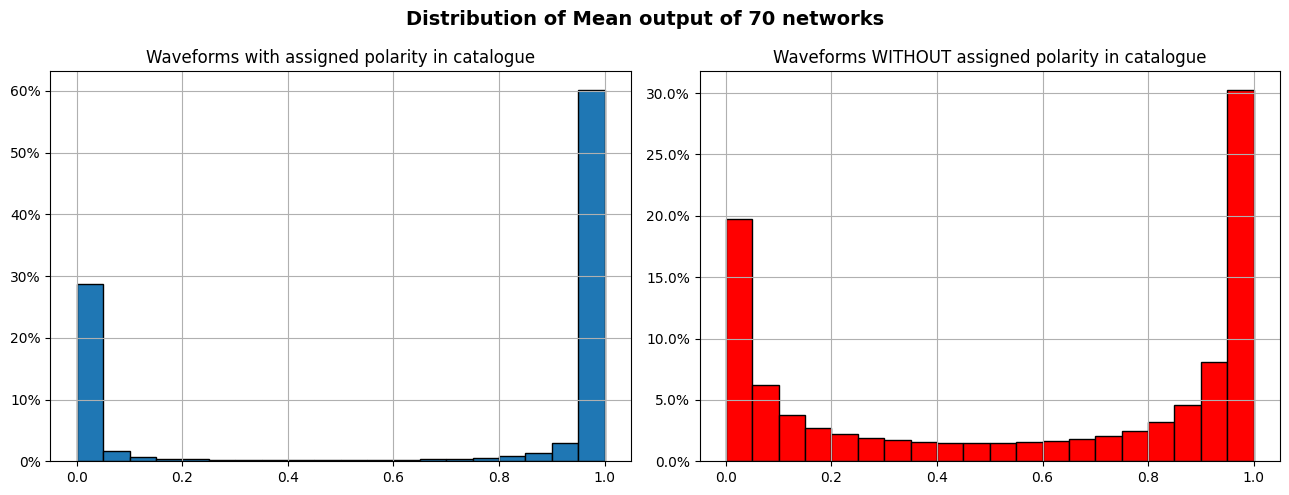

In [28]:
# Ross pol-undecidable 70 reti only mean 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

fig, axi = plt.subplots(1, 2, figsize=(13, 5))

mean_pol.hist(bins=20, edgecolor="black", ax=axi[0], weights=np.ones(len(mean_pol)) / len(mean_pol))
axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Waveforms with assigned polarity in catalogue", wrap=True, loc='center')

mean_und.hist(bins=20, edgecolor="black", color="red", ax=axi[1], weights=np.ones(len(mean_und)) / len(mean_und))
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Waveforms WITHOUT assigned polarity in catalogue", wrap=True)

fig.suptitle("Distribution of Mean output of 70 networks", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

['Pred_More_1_0', 'Pred_More_1_1', 'Pred_More_1_2', 'Pred_More_1_3', 'Pred_More_1_4', 'Pred_More_1_5', 'Pred_More_1_6']


<AxesSubplot:>

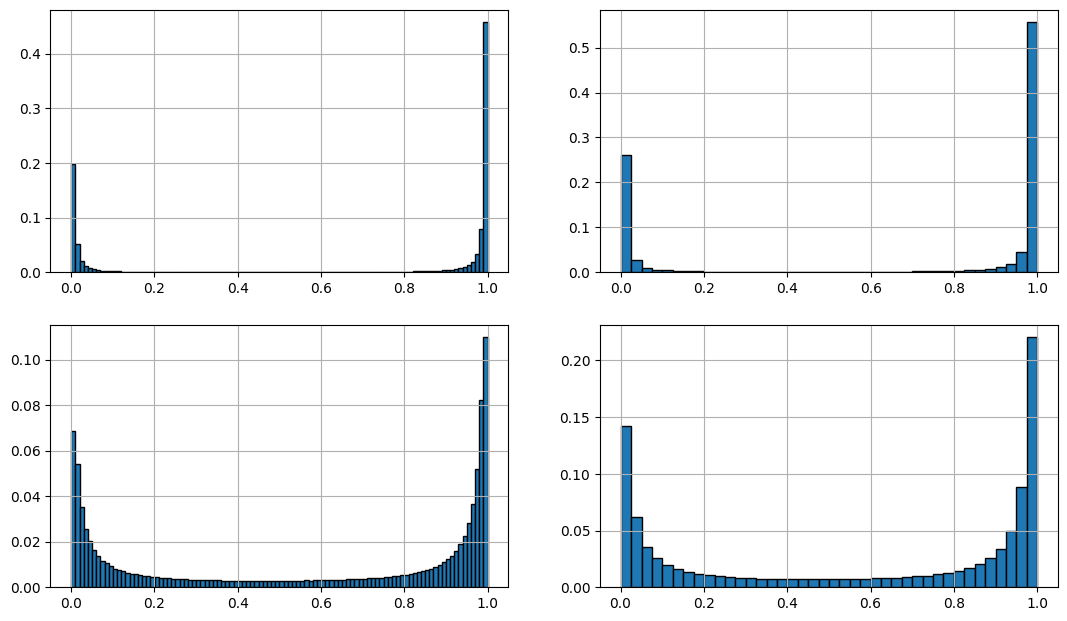

In [23]:
# Ross 7 reti

import pandas as pd
import numpy as np
pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_undecidable_shift+1_more1_to_more10/File_buono.csv"
pat_pol = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_polarity_shift+1_more1_to_more10/File_buono.csv"
datapd_pol = pd.read_csv(pat_pol)
datapd_und = pd.read_csv(pat_und)
mean_pol = datapd_pol.loc[:,list(datapd_pol.columns)[2:]].mean(axis=1)  # elimino col traccia e y_mano!
mean_und = datapd_und.mean(axis=1)

lis = []
for i, col in enumerate(datapd_pol.columns):
    if i > 1:
        lis.append(col)
        print(lis[-1])
print(lis[7:14])

datapd_und = datapd_und.loc[:,lis[7:14]]
mean_und = datapd_und.mean(axis=1)
lis = []
for i, col in enumerate(datapd_und.columns):
    if i > 1:
        lis.append(col)

binnaggio = 100
import matplotlib.pyplot as plt
fig, axi = plt.subplots(2,2, figsize=(13,7.5))
mean_pol.hist(bins=binnaggio, edgecolor="black", ax=axi[0][0], weights=np.ones(len(mean_pol)) / len(mean_pol))
mean_pol.hist(bins=40, edgecolor="black", ax=axi[0][1], weights=np.ones(len(mean_pol)) / len(mean_pol))
mean_und.hist(bins=binnaggio, edgecolor="black",   ax=axi[1][0],weights=np.ones(len(mean_und)) / len(mean_und))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[1][1],weights=np.ones(len(mean_und)) / len(mean_und))

Text(0.5, 0.98, 'Distribution of Mean output of 7 networks')

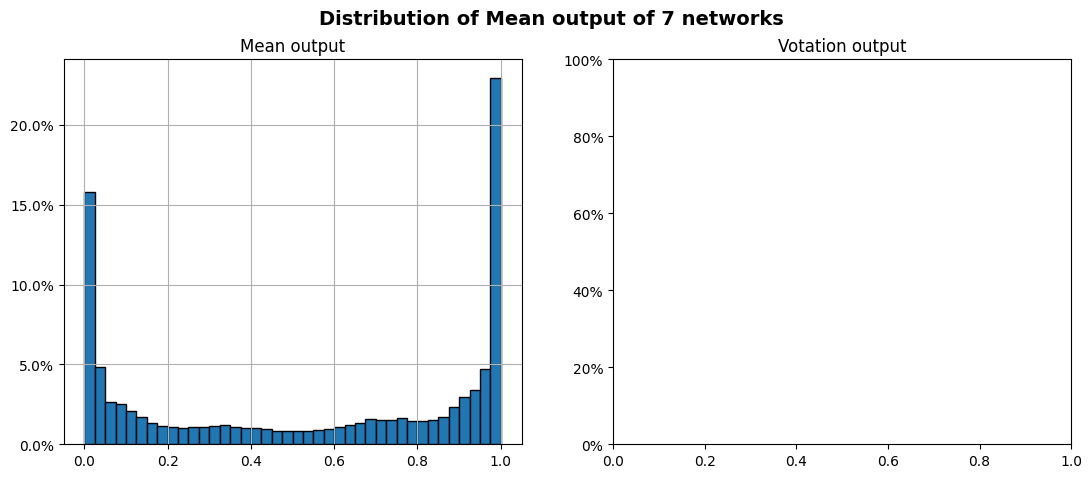

In [18]:
# Instance 7 reti
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

binnaggio = 100

pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_1/Predizioni_Instance_undecidable.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
mean_und = datapd_und.mean(axis=1)

df_bool_und = (datapd_und >=0.5)
votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution of Mean output of 7 networks", fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Distribution of Mean output of 58 networks Instance Undecidable')

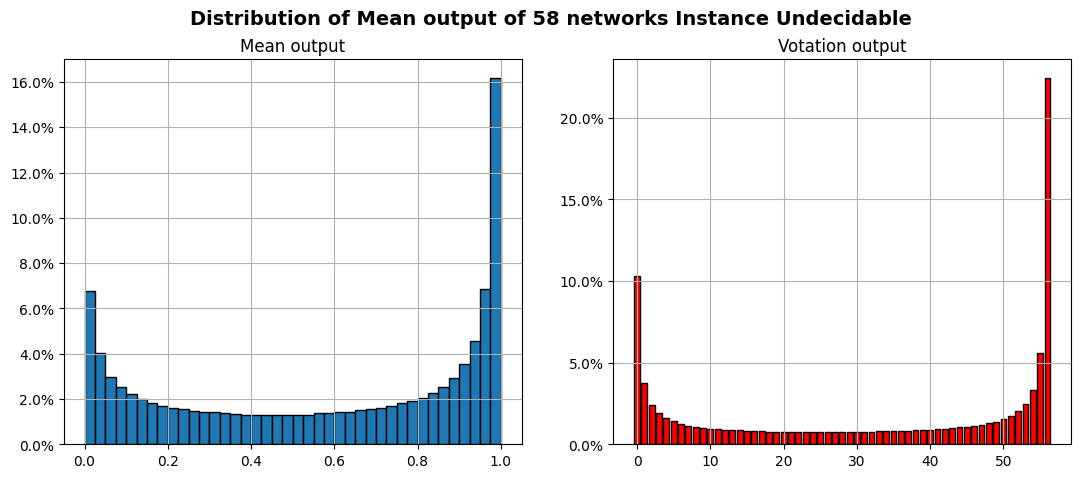

In [8]:
# Instance 56 reti
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
mean_und = datapd_und.mean(axis=1)

df_bool_und = (datapd_und >=0.5)
votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(57):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution of Mean output of 56 networks Instance Undecidable", fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Distribution of Mean output of 7 random selected networks Instance Undecidable')

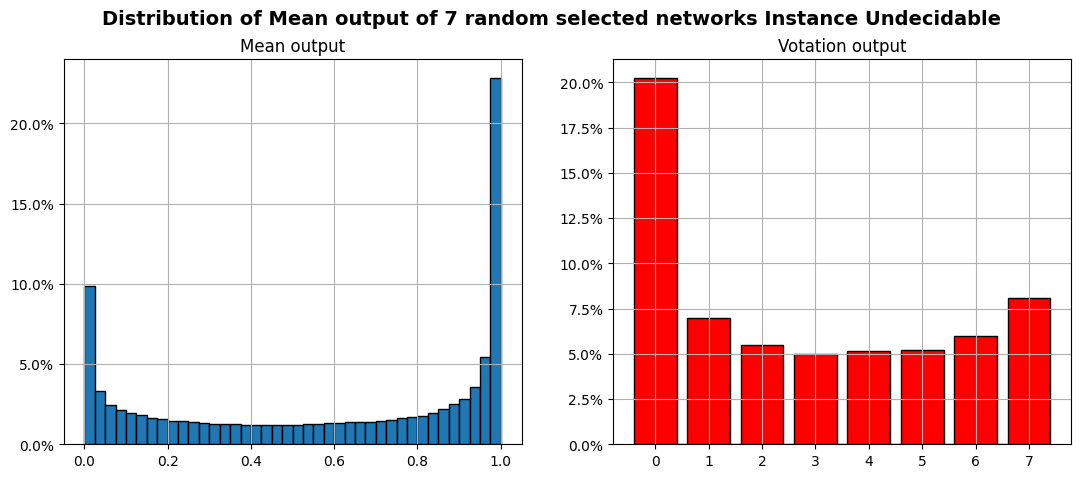

In [78]:
# Instance 7 reti (scelte a caso 1 ogni impostazioni di addestramento!)
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
# ATTTENTO QUI
icol = datapd_und.columns
perm = np.random.randint(0, 7, size=8)
datapd_und2 = datapd_und[[icol[0+perm[0]], icol[7+perm[1]], icol[14+perm[2]], icol[21+perm[3]],
                         icol[28+perm[4]], icol[35+perm[5]], icol[42+perm[6]], icol[49+perm[7]]]]
datapd_und2


mean_und = datapd_und2.mean(axis=1)

df_bool_und = (datapd_und2 >=0.5)
votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(8):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution of Mean output of 7 random selected networks Instance Undecidable", fontsize=14, fontweight='bold')

        y_predict_More_1_0  y_predict_More_1_1  y_predict_More_1_2  \
0                 0.586749            0.973424            0.923088   
1                 0.063864            0.739523            0.173677   
2                 0.180750            0.127278            0.309272   
3                 0.989393            0.989718            0.904490   
4                 0.501216            0.689533            0.127186   
...                    ...                 ...                 ...   
922832            0.794754            0.348170            0.222449   
922833            0.991333            0.999737            0.503504   
922834            0.999873            0.999724            0.998628   
922835            0.438656            0.821389            0.521053   
922836            0.548212            0.141886            0.574043   

        y_predict_More_1_3  y_predict_More_1_4  y_predict_More_1_5  \
0                 0.886617            0.102714            0.504243   
1                 0

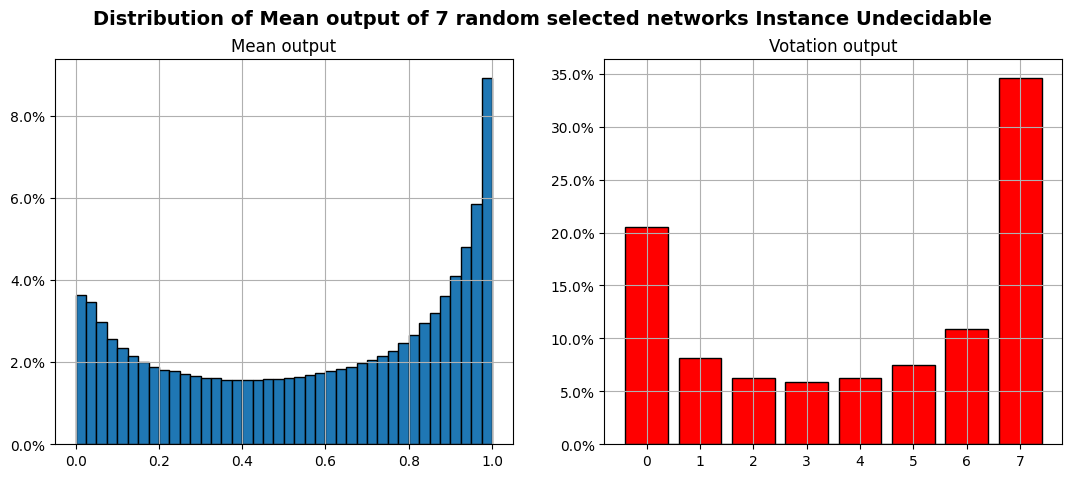

In [99]:
# Instance 7 reti (prime 7, seconde 7 etc..)
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
# datapd_und = pd.read_csv(pat_und)
# datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
# ATTTENTO QUI
icol = datapd_und.columns
tent_more = 1
perm = np.arange(7)+(tent_more-1)*7
datapd_und2 = datapd_und[[icol[perm[0]], icol[perm[1]], icol[perm[2]], icol[perm[3]],
                         icol[perm[4]], icol[perm[5]], icol[perm[6]]]]



mean_und = datapd_und2.mean(axis=1)

df_bool_und = (datapd_und2 >=0.5)
votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(8):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution of Mean output of 7 random selected networks Instance Undecidable", fontsize=14, fontweight='bold')
print(datapd_und2)

Text(0.5, 1.0, 'y_predict_More_6_0')

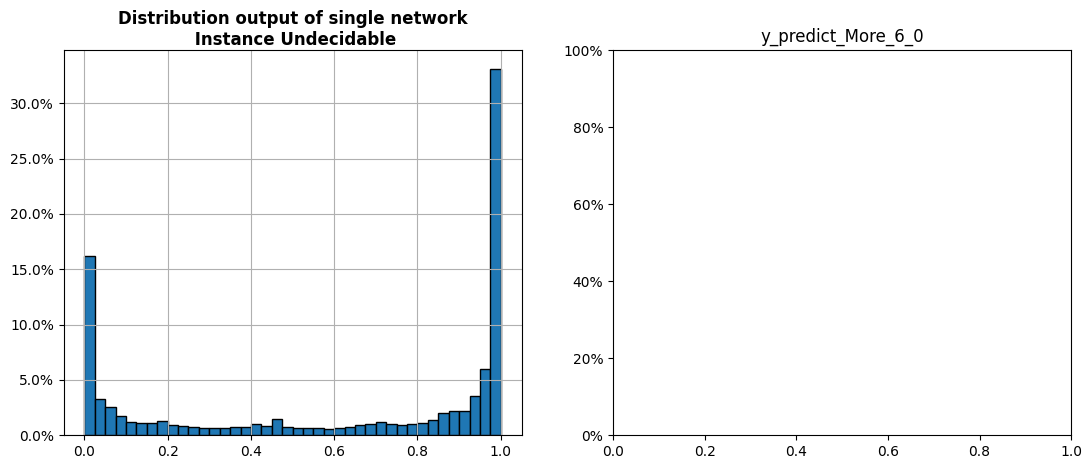

In [12]:
# Instance singola rete di 56

import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
# datapd_und = pd.read_csv(pat_und)
# datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
numm = 35
mean_und = datapd_und[datapd_und.columns[numm]]


df_bool_und = (datapd_und >=0.5)
# votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(57):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
# votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Distribution output of single network\n Instance Undecidable", wrap=True, loc='center',fontweight="bold")
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title(f"{datapd_und.columns[numm]}", wrap=True)


Text(0.5, 0.98, 'Distribution output of 1 networks Instance polaity')

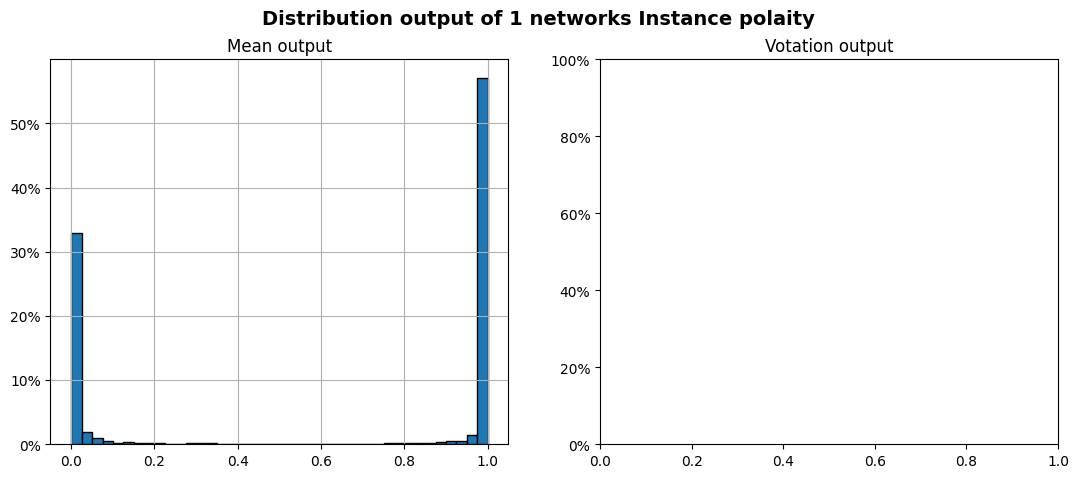

In [2]:
# Instance POLARITY singola rete
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_pol_test_more1_to_more8.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)

mean_und = datapd_und[datapd_und.columns[23]]


df_bool_und = (datapd_und >=0.5)
# votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(57):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
# votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution output of 1 networks Instance polaity", fontsize=14, fontweight='bold')

      y_predict_More_1_0  y_predict_More_1_1  y_predict_More_1_2  \
0               0.007066            0.002429            0.002889   
1               0.924240            0.960454            0.912110   
2               0.801683            0.898450            0.803296   
3               0.998400            0.997991            0.997467   
4               0.002849            0.001794            0.001866   
...                  ...                 ...                 ...   
8978            0.996836            0.998676            0.997333   
8979            0.002341            0.000581            0.000900   
8980            0.001917            0.002227            0.001586   
8981            0.995310            0.989794            0.996370   
8982            0.988142            0.980053            0.993175   

      y_predict_More_1_3  y_predict_More_1_4  y_predict_More_1_5  \
0               0.003061            0.005778            0.004886   
1               0.898505            0.898172   

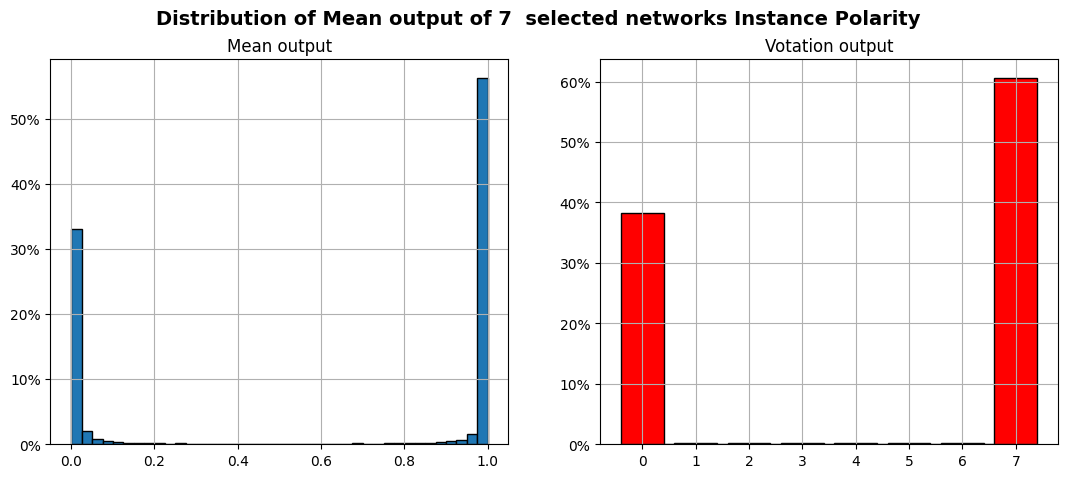

In [1]:
# Instance POLARITY 7 reti (prime 7, seconde 7 etc..)
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_pol_test_more1_to_more8.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
# ATTTENTO QUI
icol = datapd_und.columns
tent_more = 1
perm = np.arange(7)+(tent_more-1)*7
datapd_und2 = datapd_und[[icol[perm[0]], icol[perm[1]], icol[perm[2]], icol[perm[3]],
                         icol[perm[4]], icol[perm[5]], icol[perm[6]]]]



mean_und = datapd_und2.mean(axis=1)

df_bool_und = (datapd_und2 >=0.5)
votation_und = df_bool_und.sum(axis=1)



fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(8):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)
fig.suptitle("Distribution of Mean output of 7  selected networks Instance Polarity", fontsize=14, fontweight='bold')
print(datapd_und2)

Text(0.5, 0.98, 'Distribution of Mean output of 56 networks Instance Polarity')

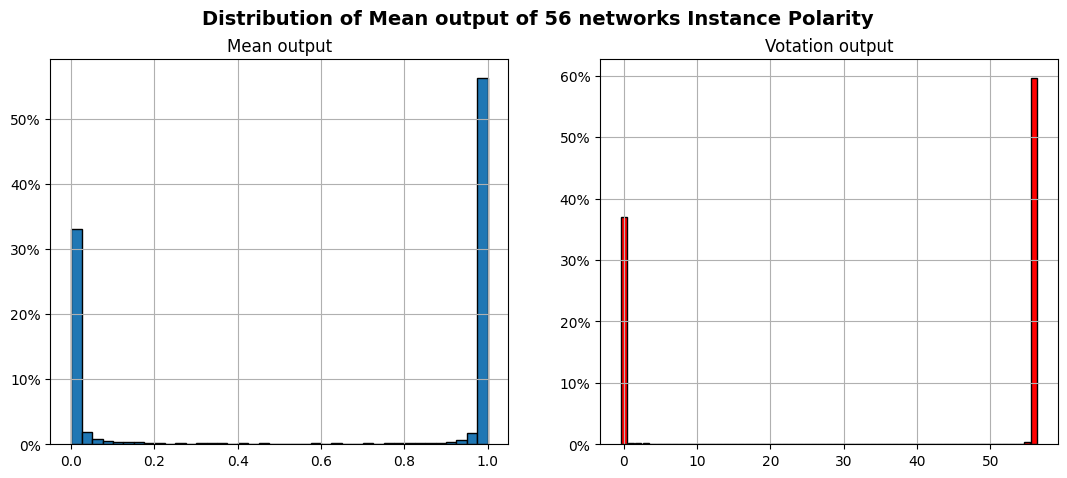

In [8]:
# Instance POLARITY 56 reti
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt



pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_pol_test_more1_to_more8.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)

mean_und = datapd_und.mean(axis=1)

df_bool_und = (datapd_und >=0.5)
votation_und = df_bool_und.sum(axis=1)


fig, axi = plt.subplots(1,2, figsize=(13,5))
mean_und.hist(bins=40, edgecolor="black",   ax=axi[0],weights=np.ones(len(mean_und)) / len(mean_und))
# bin_edges = [-0.4,0.4,0.6,1.4,1.6,2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.4,6.6,7.4]
bin_edges = []
for i in range(57):
    bin_edges.append(-0.4+i)
    bin_edges.append(0.4+i)
votation_und.hist(bins=bin_edges,edgecolor="black",   ax=axi[1],weights=np.ones(len(mean_und)) / len(mean_und), color = "red")

axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Mean output", wrap=True, loc='center')
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Votation output", wrap=True)

fig.suptitle("Distribution of Mean output of 56 networks Instance Polarity", fontsize=14, fontweight='bold')


In [4]:
# INSTANCE undecidable SORT 7 reti
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd
# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_ross_undecidable_shift+1_more1_to_more10/File_buono.csv"
# hdf5in = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_data.hdf5"
# csv5in = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_metadata.csv"

hdf5in = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_data_tot_no0.hdf5"
csv5in = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_metadata_tot_no0.csv"
pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"

pred = pd.read_csv(pat_und)
pred = pred[["y_predict_More_1_0","y_predict_More_1_1","y_predict_More_1_2","y_predict_More_1_3","y_predict_More_1_4","y_predict_More_1_5","y_predict_More_1_6"]]
print(pred,"\n\n\n")
mean_und = pred.mean(axis=1)
mean_und = mean_und.sort_values()
print(mean_und)

elenco_pos = mean_und>0.95
elenco_neg = mean_und<0.05                                      # Give Boolean List
elenco_neu = (mean_und > 0.45) & (mean_und < 0.55)

ind_pos = elenco_pos[elenco_pos].index
ind_neg = elenco_neg[elenco_neg].index                          # Indexes
ind_neu = elenco_neu[elenco_neu].index  

# pat = '/home/silvia/Desktop/Instance_Data/Undecidable'
print("\n\n\n")
ind_pos2 = mean_und[-400:]
print(ind_pos[-400:], ind_pos2)
# save indexes
# indici = pd.DataFrame.from_dict({"400_more_positive": ind_pos[-400: ], "400_more_negative": ind_neg[0:400], "400 random with 0.45 < prediction < 0.55":ind_neu[0:400]})
# indici.to_csv('/home/silvia/Desktop/Instance_Data/Undecidable/Indici_instance_undecidable_more_pos_neg_neu_more1_0_to_more1_6.csv', index=False)

        y_predict_More_1_0  y_predict_More_1_1  y_predict_More_1_2  \
0                 0.586749            0.973424            0.923088   
1                 0.063864            0.739523            0.173677   
2                 0.180750            0.127278            0.309272   
3                 0.989393            0.989718            0.904490   
4                 0.501216            0.689533            0.127186   
...                    ...                 ...                 ...   
922832            0.794754            0.348170            0.222449   
922833            0.991333            0.999737            0.503504   
922834            0.999873            0.999724            0.998628   
922835            0.438656            0.821389            0.521053   
922836            0.548212            0.141886            0.574043   

        y_predict_More_1_3  y_predict_More_1_4  y_predict_More_1_5  \
0                 0.886617            0.102714            0.504243   
1                 0

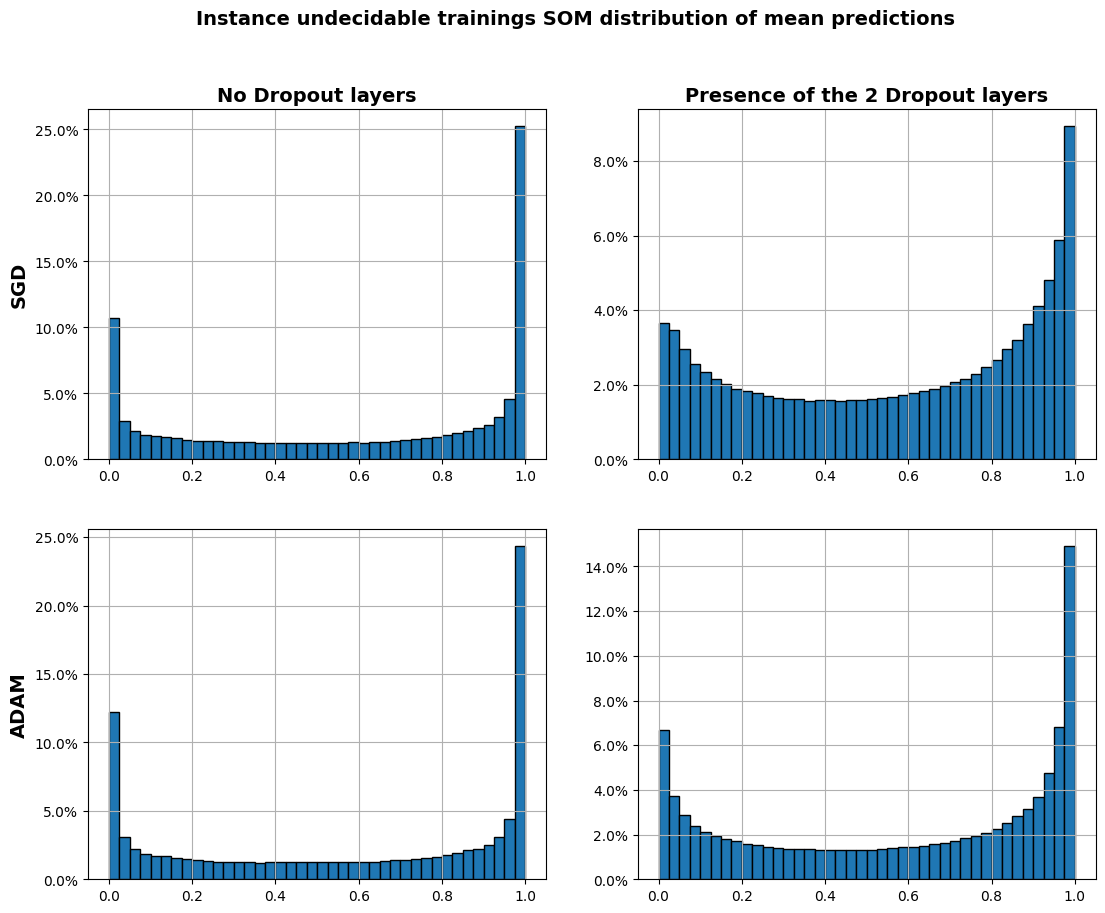

In [41]:
# Instance 4x7 reti (prime 7, seconde 7 etc..)
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
# datapd_und = pd.read_csv(pat_und)
# datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
# ATTTENTO QUI
icol = datapd_und.columns
tent_more = np.array([1,2,3,4])
perm = np.array([np.arange(7),np.arange(7),np.arange(7),np.arange(7)])
for i in range(4):
    perm[i] = np.arange(7)+(tent_more[i]-1)*7

datapd_und1 = datapd_und[[icol[perm[0][0]], icol[perm[0][1]], icol[perm[0][2]], icol[perm[0][3]],
                         icol[perm[0][4]], icol[perm[0][5]], icol[perm[0][6]]]]
mean_und1 = datapd_und1.mean(axis=1)

datapd_und2 = datapd_und[[icol[perm[1][0]], icol[perm[1][1]], icol[perm[1][2]], icol[perm[1][3]],
                         icol[perm[1][4]], icol[perm[1][5]], icol[perm[1][6]]]]
mean_und2 = datapd_und2.mean(axis=1)

datapd_und3 = datapd_und[[icol[perm[2][0]], icol[perm[2][1]], icol[perm[2][2]], icol[perm[2][3]],
                         icol[perm[2][4]], icol[perm[2][5]], icol[perm[2][6]]]]
mean_und3 = datapd_und3.mean(axis=1)

datapd_und4 = datapd_und[[icol[perm[3][0]], icol[perm[3][1]], icol[perm[3][2]], icol[perm[3][3]],
                         icol[perm[3][4]], icol[perm[3][5]], icol[perm[3][6]]]]
mean_und4 = datapd_und4.mean(axis=1)



fig, axi = plt.subplots(2,2, figsize=(13,10))
mean_und1.hist(bins=40, edgecolor="black",   ax=axi[0][1],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und2.hist(bins=40, edgecolor="black",   ax=axi[0][0],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und3.hist(bins=40, edgecolor="black",   ax=axi[1][0],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und4.hist(bins=40, edgecolor="black",   ax=axi[1][1],weights=np.ones(len(mean_und1)) / len(mean_und1))



axi[0][0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0][1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1][0].yaxis.set_major_formatter(PercentFormatter(1))
axi[1][1].yaxis.set_major_formatter(PercentFormatter(1))
axi[0][0].set_ylabel("SGD", fontsize=14, fontweight='bold')
axi[1][0].set_ylabel("ADAM", fontsize=14, fontweight='bold')

axi[0][0].set_title("No Dropout layers", loc="center", fontsize=14, fontweight='bold')
axi[0][1].set_title("Presence of the 2 Dropout layers", loc="center", fontsize=14, fontweight='bold')

fig.suptitle("Instance undecidable trainings SOM distribution of mean predictions", fontsize=14, fontweight='bold')
ipath = "/home/silvia/Desktop"
plt.savefig(ipath + '/Mean_varying_setting_Integral_undecidable.jpg', dpi=300, bbox_inches='tight')


NameError: name 'mean_und1' is not defined

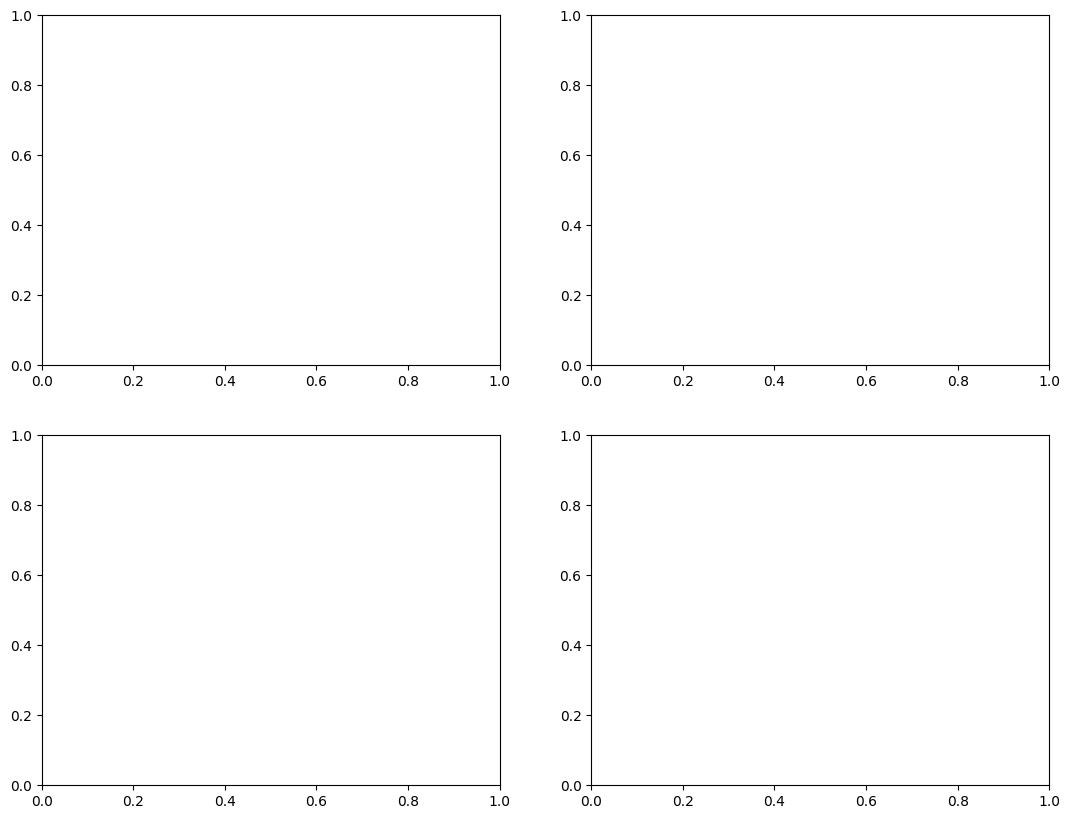

In [9]:
# Instance 4x7 reti (prime 7, seconde 7 etc..)
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

# pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
# datapd_und = pd.read_csv(pat_und)
# datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
# ATTTENTO QUI
icol = datapd_und.columns
tent_more = np.array([5,6,7,8])
perm = np.array([np.arange(7),np.arange(7),np.arange(7),np.arange(7)])
for i in range(4):
    perm[i] = np.arange(7)+(tent_more[i]-1)*7

datapd_und5 = datapd_und[[icol[perm[0][0]], icol[perm[0][1]], icol[perm[0][2]], icol[perm[0][3]],
                         icol[perm[0][4]], icol[perm[0][5]], icol[perm[0][6]]]]
mean_und5 = datapd_und5.mean(axis=1)

datapd_und6 = datapd_und[[icol[perm[1][0]], icol[perm[1][1]], icol[perm[1][2]], icol[perm[1][3]],
                         icol[perm[1][4]], icol[perm[1][5]], icol[perm[1][6]]]]
mean_und6 = datapd_und6.mean(axis=1)

datapd_und7 = datapd_und[[icol[perm[2][0]], icol[perm[2][1]], icol[perm[2][2]], icol[perm[2][3]],
                         icol[perm[2][4]], icol[perm[2][5]], icol[perm[2][6]]]]
mean_und7 = datapd_und7.mean(axis=1)

datapd_und8 = datapd_und[[icol[perm[3][0]], icol[perm[3][1]], icol[perm[3][2]], icol[perm[3][3]],
                         icol[perm[3][4]], icol[perm[3][5]], icol[perm[3][6]]]]
mean_und8 = datapd_und8.mean(axis=1)



fig, axi = plt.subplots(2,2, figsize=(13,10))
mean_und5.hist(bins=40, edgecolor="black",   ax=axi[1][1],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und6.hist(bins=40, edgecolor="black",   ax=axi[1][0],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und7.hist(bins=40, edgecolor="black",   ax=axi[0][0],weights=np.ones(len(mean_und1)) / len(mean_und1))
mean_und8.hist(bins=40, edgecolor="black",   ax=axi[0][1],weights=np.ones(len(mean_und1)) / len(mean_und1))



axi[0][0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0][1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1][0].yaxis.set_major_formatter(PercentFormatter(1))
axi[1][1].yaxis.set_major_formatter(PercentFormatter(1))
axi[0][0].set_ylabel("SGD", fontsize=14, fontweight='bold')
axi[1][0].set_ylabel("ADAM", fontsize=14, fontweight='bold')

axi[0][0].set_title("No Dropout layers", loc="center", fontsize=14, fontweight='bold')
axi[0][1].set_title("Presence of the 2 Dropout layers", loc="center", fontsize=14, fontweight='bold')

fig.suptitle("Instance undecidable trainings SOM distribution of mean predictions", wrap=True, fontsize=14, fontweight='bold')
ipath = "/home/silvia/Desktop"
plt.savefig(ipath + '/Mean_varying_setting_SOMcleaned_undecidable.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# QUALCOSINA DI BELLO (FIGURE 4 PAPER WIRN)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter


pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_undecidable_more1_to_more10.csv"
pat_pol = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/Predizioni_Instance_pol_test_more1_to_more8.csv"
datapd_und = pd.read_csv(pat_und)
datapd_pol = pd.read_csv(pat_pol)

datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
mean_und = datapd_und.mean(axis=1)

datapd_pol = datapd_pol.drop(["traccia", "y_mano"], axis=1)
mean_pol = datapd_pol.mean(axis=1)

fig, axi = plt.subplots(1, 2, figsize=(13, 5))

mean_pol.hist(bins=20, edgecolor="black", ax=axi[0], weights=np.ones(len(mean_pol)) / len(mean_pol))
axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Waveforms with assigned polarity in catalogue (CAMBIA)", wrap=True, loc='center')

mean_und.hist(bins=20, edgecolor="black", color="red", ax=axi[1], weights=np.ones(len(mean_und)) / len(mean_und))
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Waveforms WITHOUT assigned polarity in catalogue (CAMBIA)", wrap=True)

fig.suptitle("Distribution of Mean output of 70 networks (CAMBIA)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [1]:
# MC_Dropout
import time
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt
from Classe_sismogramma_v3 import ClasseDataset
import gc

class MCDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

hdf5_predicting = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_data_tot_no0.hdf5"
csv_predicting = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_metadata_tot_no0.csv"

Data_predicting = ClasseDataset()
Data_predicting.leggi_custom_dataset(hdf5_predicting, csv_predicting)
sample_train = len(Data_predicting.sismogramma)
print("Ho Letto dataset")
lung = len(Data_predicting.sismogramma[0])
semi_amp = 80
tent = "More_1_4"
model_pat = f'/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_1/4/Tentativo_{tent}.hdf5'
nome_predizione = f"/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_{tent}.csv"
quante_predizioni = 1
salva_predizioni = True
time_shift = 0

xtest = np.zeros((sample_train, semi_amp * 2))
for k in range(sample_train):
    xtest[k] = Data_predicting.sismogramma[k][lung // 2 - semi_amp + time_shift:lung // 2 + semi_amp + time_shift]
xtest = np.array(xtest)
print("XSHAPEEEEEEEEEEEE", xtest.shape)
model = keras.models.load_model(model_pat)
model.summary()

model_MCD = keras.models.Sequential([
        model.get_layer(index=0),
        MCDropout(0.5),
        model.get_layer(index=2),
        model.get_layer(index=3),
        model.get_layer(index=4),
        model.get_layer(index=5),
        model.get_layer(index=6),
        MCDropout(0.5),
        model.get_layer(index=8),
        model.get_layer(index=9),
        model.get_layer(index=10),
        model.get_layer(index=11),
        model.get_layer(index=12),
    ])
model_MCD.summary()
pred = pd.DataFrame.from_dict({"traccia":Data_predicting.metadata["trace_name"], "y_mano": "unndecidable"})

for i in range(quante_predizioni):
    y_predicted = model_MCD.predict(xtest, batch_size=2048)
    y_predicted = np.reshape(y_predicted,len(y_predicted))
    pred[f"pred_n_{i}"] = y_predicted



    


2023-06-28 13:33:03.700364: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


tottoapporsto
Ho Letto dataset
XSHAPEEEEEEEEEEEE (922837, 160)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 160, 32)           192       
                                                                 
 dropout_8 (Dropout)         (None, 160, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 157, 64)           8256      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 78, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 76, 128)           24704     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 38, 128)          0 

2023-06-28 13:33:44.009285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 13:33:44.591408: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6210 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:9e:00.0, compute capability: 7.5


Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 160, 32)           192       
                                                                 
 mc_dropout (MCDropout)      (None, 160, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 157, 64)           8256      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 78, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 76, 128)           24704     
                                                                 
 max_pooling1d_13 (MaxPoolin  (N

2023-06-28 13:33:47.101341: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


451/451 [==============================] - 12s 22ms/step


In [2]:
pred

,traccia,y_mano,pred_n_0
0,10000541.MN.AQU..HH,unndecidable,0.570697
1,10000541.MN.AQU..HL,unndecidable,0.103258
2,10000541.IV.ASSB..HH,unndecidable,0.968556
3,10000541.IV.EL6..EH,unndecidable,0.992566
4,10000541.IV.FDMO..HH,unndecidable,0.236672
...,...,...,...
922832,908231.IV.T0813..HN,unndecidable,0.875326
922833,908231.IV.T0816..EH,unndecidable,0.998383
922834,908231.IV.T0816..HN,unndecidable,0.999715
922835,908231.IV.T0817..EH,unndecidable,0.313224


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter

fig, axi = plt.subplots(1, 2, figsize=(13, 5))



mean_pol.hist(bins=20, edgecolor="black", ax=axi[0], weights=np.ones(len(mean_pol)) / len(mean_pol))
axi[0].yaxis.set_major_formatter(PercentFormatter(1))
axi[0].set_title("Waveforms with assigned polarity in catalogue", wrap=True, loc='center')

mean_und.hist(bins=20, edgecolor="black", color="red", ax=axi[1], weights=np.ones(len(mean_und)) / len(mean_und))
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Waveforms WITHOUT assigned polarity in catalogue", wrap=True)

fig.suptitle("Distribution of Mean output of 70 networks", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()